# Capstone Project
## Image classifier for the SVHN dataset
### Instructions

In this notebook, I will create a neural network that classifies real-world images digits. I have usef concepts from throughout this course in building, training, testing, validating and saving the Tensorflow classifier model.


### Let's get started!

We'll start by running some imports, and loading the dataset. For this project you are free to make further imports throughout the notebook as you wish. 

In [ ]:
from scipy.io import loadmat
from sklearn.preprocessing import LabelBinarizer
import seaborn as sns
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os # accessing directory structure
import cv2
import random
from google.colab.patches import cv2_imshow
import glob
import tensorflow as tf
from sklearn.metrics import confusion_matrix

For the capstone project, I will use the [SVHN dataset](http://ufldl.stanford.edu/housenumbers/). This is an image dataset of over 600,000 digit images in all, and is a harder dataset than MNIST as the numbers appear in the context of natural scene images. SVHN is obtained from house numbers in Google Street View images.

* Y. Netzer, T. Wang, A. Coates, A. Bissacco, B. Wu and A. Y. Ng. "Reading Digits in Natural Images with Unsupervised Feature Learning". NIPS Workshop on Deep Learning and Unsupervised Feature Learning, 2011.

The train and test datasets required for this project can be downloaded from [here](http://ufldl.stanford.edu/housenumbers/train.tar.gz) and [here](http://ufldl.stanford.edu/housenumbers/test.tar.gz). Once unzipped, I will have two files: `train_32x32.mat` and `test_32x32.mat`. You should store these files in Drive for use in this Colab notebook.

the goal is to develop an end-to-end workflow for building, training, validating, evaluating and saving a neural network that classifies a real-world image into one of ten classes.

In [ ]:
# Run this cell to connect to the Drive folder

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Load the dataset from the Drive folder

train = loadmat('/content/gdrive/MyDrive/dataset_capstone_week1/train_32x32.mat')
test = loadmat('/content/gdrive/MyDrive/dataset_capstone_week1/test_32x32.mat')

In [ ]:
train_images=train['X']
test_images1=test['X']
test_images=test['X']


train_label=train['y']
test_label=test['y']

In [ ]:
train_label

array([[1],
       [9],
       [2],
       ...,
       [1],
       [6],
       [9]], dtype=uint8)

In [ ]:
!mkdir hsvn-image

In [ ]:
!tar -xvf '/content/gdrive/MyDrive/dataset_capstone_week1/train.tar.gz' -C '/content/hsvn-image'
!tar -xvf '/content/gdrive/MyDrive/dataset_capstone_week1/test.tar.gz' -C '/content/hsvn-image'


Streaming output truncated to the last 5000 lines.
test/2574.png
test/2554.png
test/2550.png
test/2549.png
test/2535.png
test/2528.png
test/2519.png
test/2516.png
test/2510.png
test/2504.png
test/2494.png
test/2491.png
test/2485.png
test/2477.png
test/2470.png
test/2432.png
test/2390.png
test/2385.png
test/2351.png
test/2339.png
test/2320.png
test/2316.png
test/2315.png
test/2296.png
test/2279.png
test/2271.png
test/2258.png
test/2249.png
test/2245.png
test/2229.png
test/2209.png
test/2197.png
test/2192.png
test/2190.png
test/2186.png
test/2178.png
test/2175.png
test/2157.png
test/2154.png
test/2150.png
test/2148.png
test/2128.png
test/2126.png
test/2116.png
test/2103.png
test/2077.png
test/2061.png
test/2047.png
test/2015.png
test/1945.png
test/1939.png
test/1903.png
test/1869.png
test/1859.png
test/1847.png
test/1836.png
test/1826.png
test/1817.png
test/1804.png
test/1796.png
test/1791.png
test/1783.png
test/1773.png
test/1764.png
test/1744.png
test/1718.png
test/1680.png
test/1678.p

In [ ]:
# Fixing the axis of the image
# Fix the axes of the images

train_images = np.moveaxis(train_images, -1, 0)
test_images = np.moveaxis(test_images, -1, 0)
test_images1 = np.moveaxis(test_images1, -1, 0)


print(train_images.shape)
print(test_images.shape)

(73257, 32, 32, 3)
(26032, 32, 32, 3)


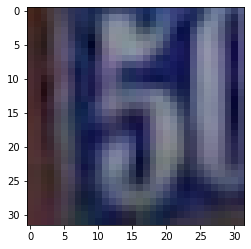

Label:  [5]


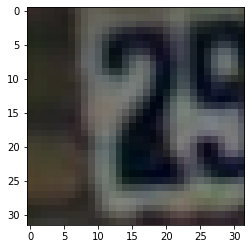

Label:  [2]


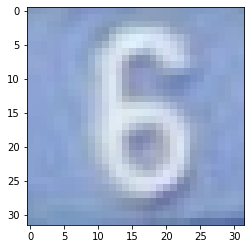

Label:  [6]


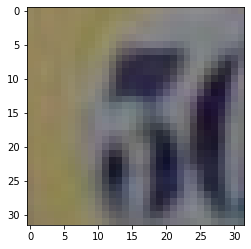

Label:  [3]


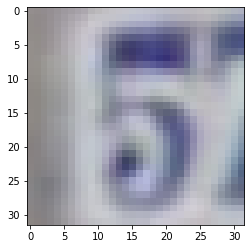

Label:  [5]


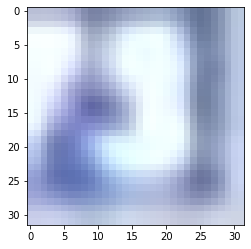

Label:  [3]


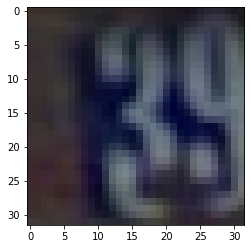

Label:  [3]


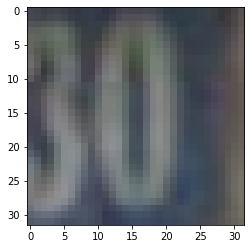

Label:  [10]


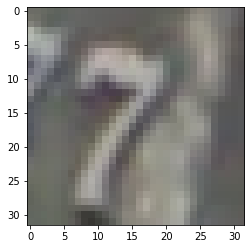

Label:  [7]


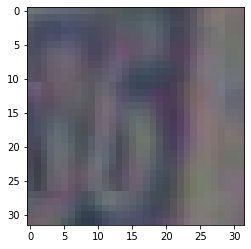

Label:  [6]


In [ ]:
for images in glob.glob('/content/hsvn-image/train/*')[:10]:
  x=images.split(sep='/')[4].split(sep='.')[0]
  x=int(x)
  plt.imshow(train_images[x])
  plt.show()
  print('Label: ', train_label[x])

Both `train` and `test` are dictionaries with keys `X` and `y` for the input images and labels respectively.

## 1. Inspect and preprocess the dataset
* Extract the training and testing images and labels separately from the train and test dictionaries loaded for you.
* Select a random sample of images and corresponding labels from the dataset (at least 10), and display them in a figure.
* Convert the training and test images to grayscale by taking the average across all colour channels for each pixel. _Hint: retain the channel dimension, which will now have size 1._
* Select a random sample of the grayscale images and corresponding labels from the dataset (at least 10), and display them in a figure.

In [ ]:
print(train_images.shape)
print(test_images.shape)
print(train_label.shape)
print(test_label.shape)
print(train_images[0].shape)

(73257, 32, 32, 3)
(26032, 32, 32, 3)
(73257, 1)
(26032, 1)
(32, 32, 3)


In [ ]:
grey1=[]
for i in range(train_images.shape[0]):
  b,g,r=cv2.split(train_images[i])
  grey=(b/3)+(g/3)+(r/3)
  grey1.append(grey)

In [ ]:
grey1_train=np.array(grey1).reshape(73257, 32, 32)

In [ ]:
print(grey1_train.shape)

(73257, 32, 32)


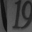

[1]


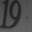

[9]


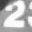

[2]


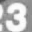

[3]


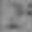

[2]


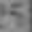

[5]


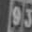

[9]


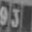

[3]


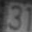

[3]


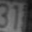

[1]


In [ ]:
for i in range(10):
  cv2_imshow(grey1_train[i])
  print(train_label[i])

In [ ]:
# Convert train and test images into 'float64' type

grey1_train = grey1_train.astype('float64')
test_images = test_images.astype('float64')
test_images1 = test_images1.astype('float64')

In [ ]:
# Convert train and test labels into 'int64' type

train_label = train_label.astype('int64')
test_label = test_label.astype('int64')

In [ ]:
train_label[55].dtype

dtype('int64')

In [ ]:
grey1_train  = grey1_train/255

In [ ]:
test_images=test_images/255
test_images1=test_images1/255

## 2. MLP neural network classifier
* Build an MLP classifier model using the Sequential API. the model should use only Flatten and Dense layers, with the final layer having a 10-way softmax output. 
* You should design and build the model theself. Feel free to experiment with different MLP architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 4 or 5 layers._
* Print out the model summary (using the summary() method)
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run. 
* the model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* As a guide, you should aim to achieve a final categorical cross entropy training loss of less than 1.0 (the validation loss might be higher).
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [ ]:
#Creating validation dataset
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(grey1_train ,train_label,test_size=0.2)
len(X_train), len(X_val)

(58605, 14652)

In [ ]:
X_train.shape, train_label.shape

((58605, 32, 32), (73257, 1))

In [ ]:
lb = LabelBinarizer()

In [ ]:
y_train = lb.fit_transform(y_train)
y_val = lb.fit_transform(y_val)

In [ ]:
y_train.shape, X_train.shape

((58605, 10), (58605, 32, 32))

In [ ]:
#Importing necessary packages
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Flatten, Dense, BatchNormalization
# from tensorflow.keras import regularizers

In [ ]:
def get_regualrised_model(model1):
  input_shape=(32,32)
  model1=Sequential([
                  Flatten(input_shape=input_shape),
                  Dense(32,activation='relu'),
                  Flatten(),
                  # Dense(16,activation='relu'),
                  Dense(16,activation='relu'),
                  Dense(10,activation='softmax')

  ])
  return model1

In [ ]:
model=get_regualrised_model(X_train.shape[0])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                32800     
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                170       
Total params: 33,498
Trainable params: 33,498
Non-trainable params: 0
_________________________________________________________________


## Model Checkpoint

In [ ]:
def get_callbacks():
    """
    This function should create and return a tuple (early_stopping, learning_rate_reduction) callbacks.
    The callbacks should be instantiated according to the above requirements.
    """
    filepath='/content/hsvn-image/'
    chckpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='loss', verbose=0, save_best_only=False,
                                save_weights_only=False, mode='auto', period=1)
    early=tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3,  baseline=None, restore_best_weights=True)

    return (chckpoint,early)

In [ ]:
checkpoint, early_stop = get_callbacks()

In [ ]:
opt=tf.keras.optimizers.Adam(learning_rate=0.00025)
loss=tf.keras.losses.CategoricalCrossentropy()
model.compile(loss=loss,metrics=['accuracy'],optimizer=opt)

In [ ]:
X_val.shape, y_val.shape

((14652, 32, 32), (14652, 10))

In [ ]:
history = model.fit(X_train, y_train,epochs=30,validation_data=(X_val,y_val),callbacks=[checkpoint, early_stop])

Epoch 1/30
1832/1832 [==============================] - 5s 2ms/step - loss: 2.2314 - accuracy: 0.1877 - val_loss: 2.0535 - val_accuracy: 0.2829
INFO:tensorflow:Assets written to: /content/hsvn-image/assets
Epoch 2/30
1832/1832 [==============================] - 4s 2ms/step - loss: 1.9802 - accuracy: 0.3175 - val_loss: 1.7708 - val_accuracy: 0.3916
INFO:tensorflow:Assets written to: /content/hsvn-image/assets
Epoch 3/30
1832/1832 [==============================] - 4s 2ms/step - loss: 1.7172 - accuracy: 0.4159 - val_loss: 1.5986 - val_accuracy: 0.4550
INFO:tensorflow:Assets written to: /content/hsvn-image/assets
Epoch 4/30
1832/1832 [==============================] - 4s 2ms/step - loss: 1.5819 - accuracy: 0.4689 - val_loss: 1.5160 - val_accuracy: 0.4985
INFO:tensorflow:Assets written to: /content/hsvn-image/assets
Epoch 5/30
1832/1832 [==============================] - 4s 2ms/step - loss: 1.5156 - accuracy: 0.5011 - val_loss: 1.4539 - val_accuracy: 0.5278
INFO:tensorflow:Assets written t

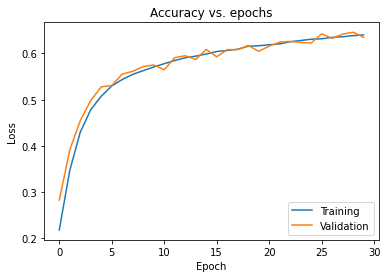

In [ ]:
#Run this cell to plot the epoch vs accuracy graph

try:
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
except KeyError:
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

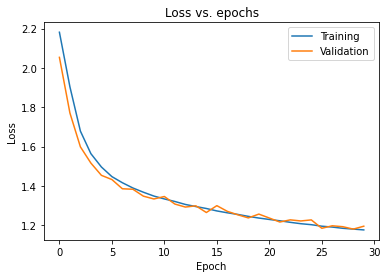

In [ ]:
#Run this cell to plot the epoch vs loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

## 3. CNN neural network classifier
* Build a CNN classifier model using the Sequential API. the model should use the Conv2D, MaxPool2D, BatchNormalization, Flatten, Dense and Dropout layers. The final layer should again have a 10-way softmax output. 
* You should design and build the model theself. Feel free to experiment with different CNN architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 2 or 3 convolutional layers and 2 fully connected layers.)_
* The CNN model should use fewer trainable parameters than the MLP model.
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run.
* the model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* You should aim to beat the MLP model performance with fewer parameters!
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from keras.layers import Conv2D,MaxPool2D, BatchNormalization,Dropout

In [ ]:
 datagen = ImageDataGenerator(rotation_range=8,
                             zoom_range=[0.95, 1.05],
                             height_shift_range=0.10,
                             shear_range=0.15)

In [ ]:
train_images_cnn = train_images.astype('float64')
test_images_cnn = test_images1.astype('float64')

train_label_cnn = train_label.astype('int64')
test_label_cnn = test_label.astype('int64')

In [ ]:
# One-hot encoding of train and test labels

lb = LabelBinarizer()
train_label_cnn = lb.fit_transform(train_label_cnn)
test_label_cnn = lb.fit_transform(test_label_cnn)

In [ ]:
train_label_cnn.shape,test_label_cnn.shape

((73257, 10), (26032, 10))

In [ ]:
#Creating validation dataset
from sklearn.model_selection import train_test_split
X_train1, X_val1, y_train1, y_va1l = train_test_split(train_images_cnn ,train_label_cnn,test_size=0.2)
len(X_train1), len(X_val1)

(58605, 14652)

In [ ]:
def get_cnn_model(model2):
  model_cnn=Sequential([
                      Conv2D(32,(3,3), padding='same',activation='relu',input_shape=(32,32,3)),
                      BatchNormalization(),
                      Dropout(0.4),
                      Conv2D(8,(3,3),padding='valid',activation='relu'),
                      MaxPool2D((2,2)),
                      Dropout(0.4),
                      # Conv2D(8,(3,3),padding='SAME',activation='relu'),
                      # BatchNormalization(),
                      # Dropout(0.4),
                      Flatten(),
                      Dense(10,activation='relu'),
                      Dense(10,activation='softmax')

  ])
  return model_cnn

In [ ]:
model_cnn1=get_cnn_model(X_train1.shape[0])

In [ ]:
lr_schedule = keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch / 10))
opt2 = keras.optimizers.Adam(lr=(1e-4)*1.6, amsgrad=True)
model_cnn1.compile(optimizer=opt2,
                  loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [ ]:
model_cnn1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_3 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_6 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 30, 30, 8)         2312      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 8)         0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 15, 15, 8)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1800)             

In [ ]:
historyprev=model_cnn1.fit(X_train1,y_train1, epochs=30, validation_data=(X_val1,y_va1l),callbacks=[checkpoint,early_stop])

Epoch 1/30
1832/1832 [==============================] - 167s 91ms/step - loss: 2.3116 - accuracy: 0.1780 - val_loss: 2.2053 - val_accuracy: 0.1848
INFO:tensorflow:Assets written to: /content/hsvn-image/assets
Epoch 2/30
1832/1832 [==============================] - 171s 93ms/step - loss: 2.1946 - accuracy: 0.1909 - val_loss: 2.1648 - val_accuracy: 0.2026
INFO:tensorflow:Assets written to: /content/hsvn-image/assets
Epoch 3/30
1832/1832 [==============================] - 174s 95ms/step - loss: 2.1225 - accuracy: 0.2131 - val_loss: 1.9806 - val_accuracy: 0.2916
INFO:tensorflow:Assets written to: /content/hsvn-image/assets
Epoch 4/30
1832/1832 [==============================] - 169s 92ms/step - loss: 1.9632 - accuracy: 0.2960 - val_loss: 1.6617 - val_accuracy: 0.4391
INFO:tensorflow:Assets written to: /content/hsvn-image/assets
Epoch 5/30
1832/1832 [==============================] - 170s 93ms/step - loss: 1.6744 - accuracy: 0.4260 - val_loss: 1.5080 - val_accuracy: 0.4794
INFO:tensorflow:A

In [ ]:
# X_train, y_train,epochs=30,validation_data=(X_val,y_val),callbacks=[checkpoint, lr_schedule]

In [ ]:
# history = model_cnn1.fit_generator(datagen.flow(X_train1, y_train1),
#                               epochs=30, validation_data=(X_val1, y_va1l),
#                               callbacks=[checkpoint,lr_schedule,early_stop])

In [ ]:
# Evaluate train and validation accuracies and losses

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

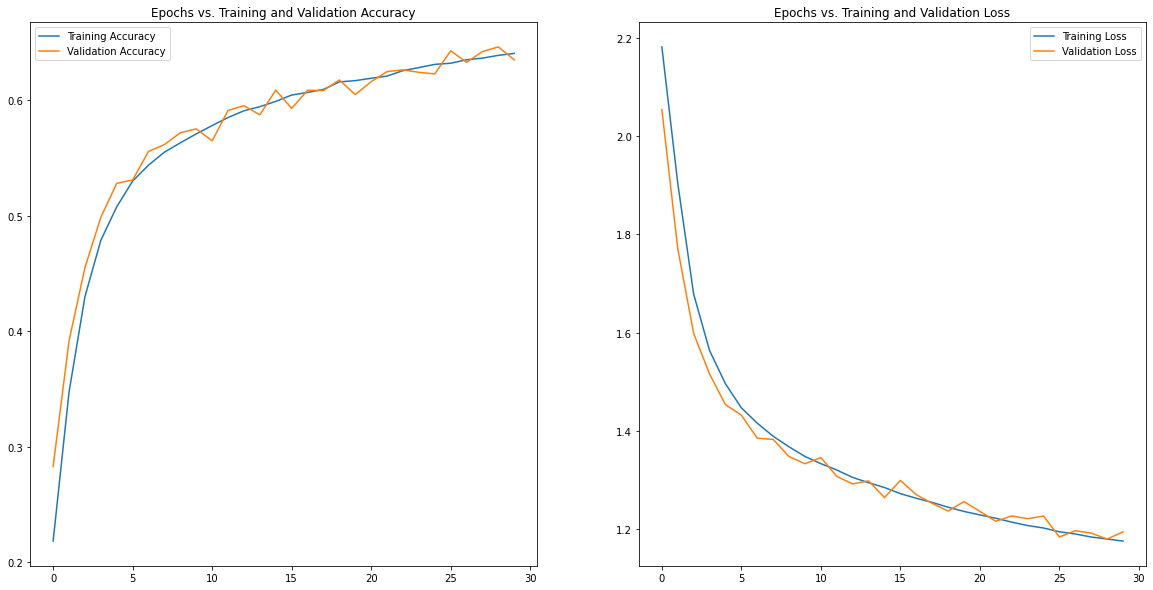

In [ ]:
# Visualize epochs vs. train and validation accuracies and losses

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Epochs vs. Training and Validation Accuracy')
    
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Epochs vs. Training and Validation Loss')

plt.show()

## 4. Get model predictions
* Load the best weights for the MLP and CNN models that you saved during the training run.
* Randomly select 5 images and corresponding labels from the test set and display the images with their labels.
* Alongside the image and label, show each model’s predictive distribution as a bar chart, and the final model prediction given by the label with maximum probability.

### Loading weights

In [ ]:
model.save('/content/gdrive/MyDrive/dataset_capstone_week1/mlp.h5')

In [ ]:
model_cnn1.save('/content/gdrive/MyDrive/dataset_capstone_week1/model_cnn.h5')

# MLP Model

/content/hsvn-image/test/9298.png


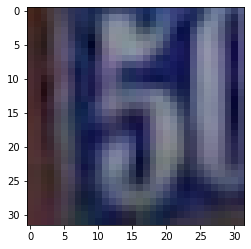

Label:  [5]
/content/hsvn-image/test/3181.png


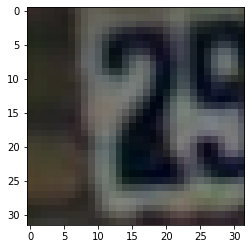

Label:  [2]
/content/hsvn-image/test/11801.png


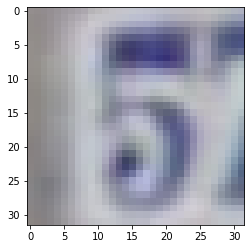

Label:  [5]
/content/hsvn-image/test/6719.png


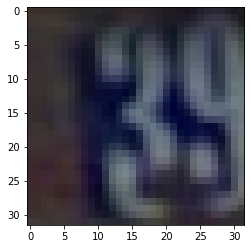

Label:  [3]
/content/hsvn-image/test/2454.png


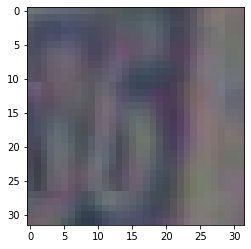

Label:  [6]


In [ ]:
for images in glob.glob('/content/hsvn-image/test/*')[:5]:
  x=images.split(sep='/')[4].split(sep='.')[0]
  print(images)
  x=int(x)
  plt.imshow(train_images[x])
  plt.show()
  print('Label: ', train_label[x])

In [ ]:
filepath='/content/gdrive/MyDrive/dataset_capstone_week1/mlp.h5'

In [ ]:
model.load_weights(filepath)

# Predictiong test dataset from MLP Model

In [ ]:
y_pred = model.predict(X_train)
y_pred_test=model.predict(X_val)
y_pred = lb.inverse_transform(y_pred, lb.classes_)
# y_train = lb.inverse_transform(y_train, lb.classes_)

  ## Showing training predictions

1


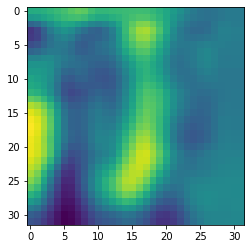

1


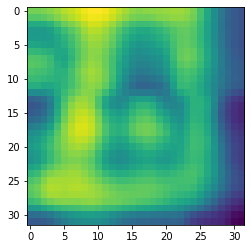

4


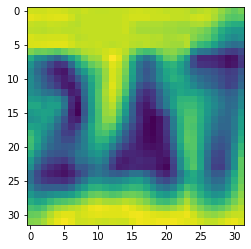

5


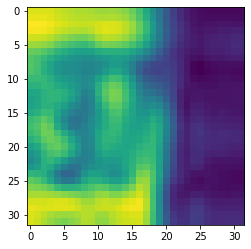

7


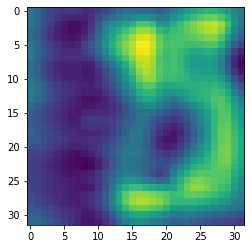

In [ ]:
for i in range(5):
  plt.imshow(X_train[i])
  print(y_pred[i])
  plt.show()

## Showing test predictions

0


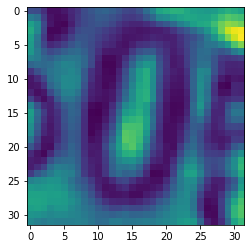

1


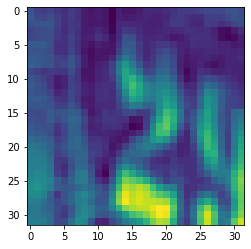

7


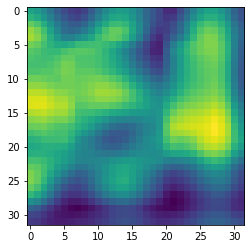

4


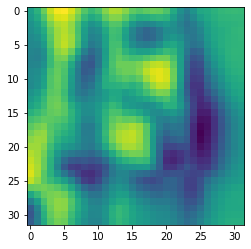

2


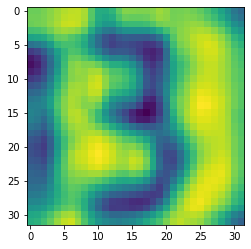

In [ ]:
mlp=[]
for i in range(5):
  plt.imshow(X_val[i])
  results=np.argmax(y_pred_test[i])
  print(results)
  mlp.append(results)
  plt.show()

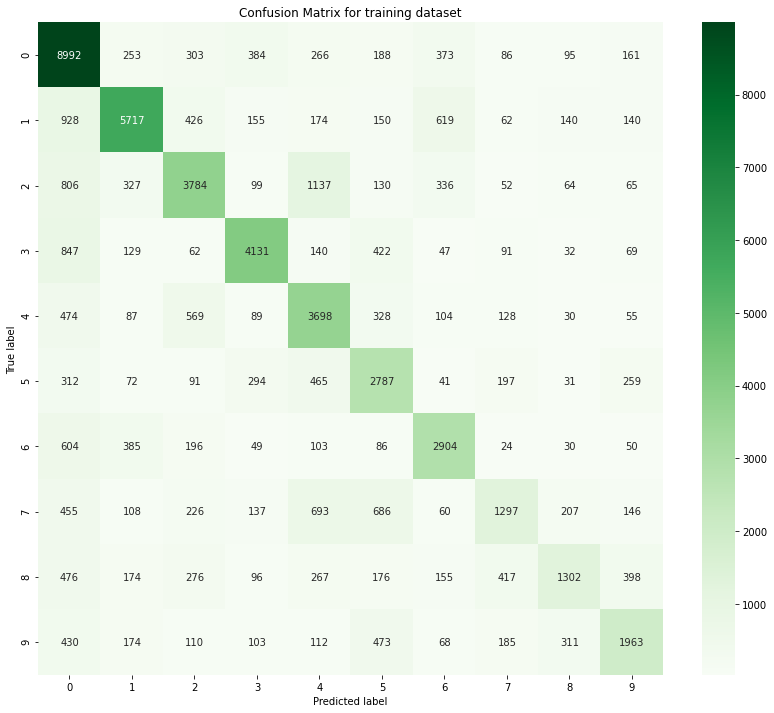

In [ ]:
# Plot the confusion matrix

matrix = confusion_matrix(y_train, y_pred, labels=lb.classes_)

fig, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(matrix, annot=True, cmap='Greens', fmt='d', ax=ax)
plt.title('Confusion Matrix for training dataset')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [ ]:
test = test_images.reshape(-1,32,32,1)
test = np.array(test, dtype="float") / 255.0 * 0.99 + 0.01
test.shape

(78096, 32, 32, 1)

# CNN Model

In [ ]:
y_pred_cnn = model_cnn1.predict(X_train1)
# y_pred_cnn= lb.inverse_transform(y_pred_cnn, lb.classes_)


y_pred_cnn_val=model_cnn1.predict(X_val1)
# y_pred_cnn_val = lb.inverse_transform(y_pred_cnn_val, lb.classes_)

1


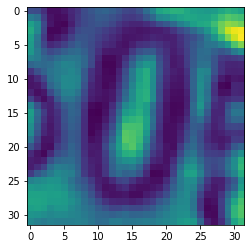

3


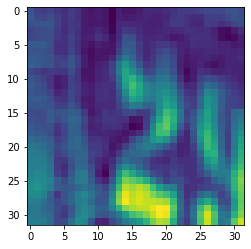

0


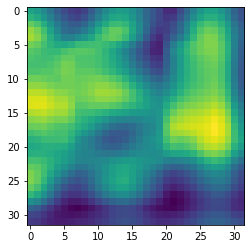

6


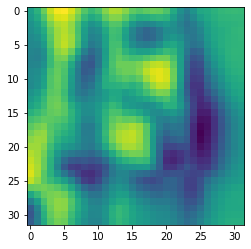

5


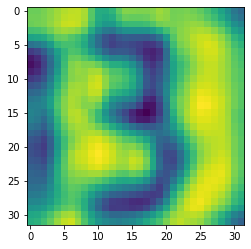

In [ ]:
cnnm=[]
for i in range(5):
  plt.imshow(X_val[i])
  results1 = y_pred_cnn_val[i].argmax(axis=0)
  cnnm.append(results1)
  print(results1)
  plt.show()

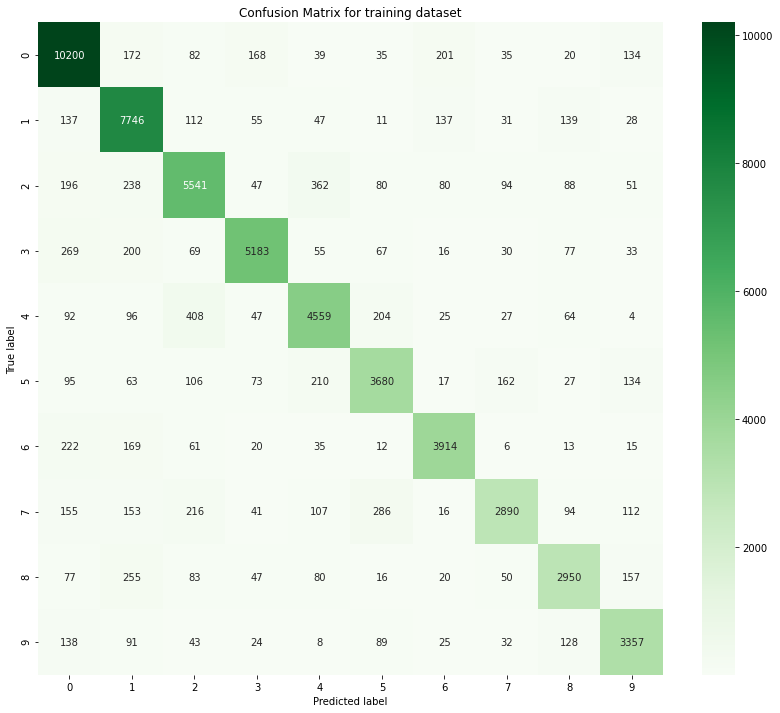

In [ ]:
# Plot the confusion matrix
matrix = confusion_matrix(y_train1, y_pred1, labels=lb.classes_)

fig, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(matrix, annot=True, cmap='Greens', fmt='d', ax=ax)
plt.title('Confusion Matrix for training dataset')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

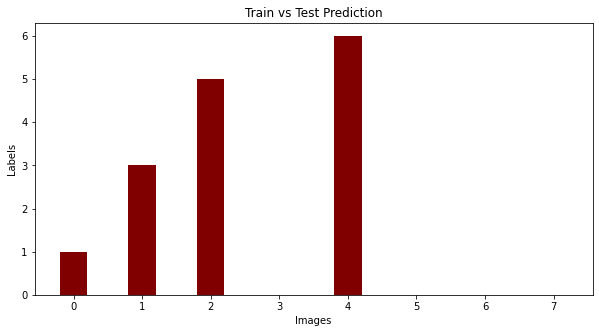

In [ ]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(mlp, cnnm, color ='maroon',
        width = 0.4)
 
plt.xlabel("Images")
plt.ylabel("Labels")
plt.title("Train vs Test Prediction")
plt.show()